# Customer Segmentation Using RFM (Recency, Frequency, and Monetary)

## Introduction 

### What is RFM?

RFM (Recency, Frequency, and Monetary) analysis measures how recently, how often, and how much money a customer has given by brand

1. Recency --> Ex: Time last order or last engaged with the product
2. Frequency --> Ex: Total number of transaction
3. Monetary --> Ex: Total transaction value

### Customer RFM segmentation readily answers these questions for your business

1. Who are my best customers?
2. Which customers are at the verge of churning?
3. Who has the potential to be converted in more profitable customers?
4. Who are lost customers that you don’t need to pay much attention to?
5. Which customers you must retain?
6. Who are your loyal customers?
7. Which group of customers is most likely to respond to your current campaign?


## Data Pre-Processing

### Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
data = pd.read_csv (r'C:\Users\Asus\Desktop\Retail_Data_Transactions.csv')

In [3]:
df = data

### Data Understanding

In [4]:
df.shape

(125000, 3)

In [5]:
df.head ()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [6]:
# Number of unique customer id
len (df.customer_id.unique ())

6889

In [7]:
# Total amount of transaction
df.tran_amount.sum()

8123989

In [8]:
# Total unique date
len (df.trans_date.unique ())

1401

In [9]:
df.info () ## The data is fully completed or there is no null transaction or data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [10]:
df.describe ()

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


### Data Preparation

#### A. Recency --> Ex: Time last order or last engaged with the product

In [11]:
# Defining Recency as two of the three columns in data:
Recency = df [['trans_date', 'customer_id']]
Recency.head ()

,trans_date,customer_id
0,11-Feb-13,CS5295
1,15-Mar-15,CS4768
2,26-Feb-13,CS2122
3,16-Nov-11,CS1217
4,20-Nov-13,CS1850


In [13]:
# Checking the data for the number of unique values:
Recency.apply (pd.Series.nunique)

trans_date     1401
customer_id    6889
dtype: int64

In [14]:
# Lets take a look at the dimensions of our data:
Recency.shape

(125000, 2)

In [15]:
Recency.info () 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   trans_date   125000 non-null  object
 1   customer_id  125000 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [17]:
# Change the format of trans_date 
Recency ['trans_date'] = pd.to_datetime (Recency.trans_date)

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
Recency.head ()

,trans_date,customer_id
0,2013-02-11,CS5295
1,2015-03-15,CS4768
2,2013-02-26,CS2122
3,2011-11-16,CS1217
4,2013-11-20,CS1850


In [19]:
Recency.info () #the trans_date data tyoe has been changed to be datetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   trans_date   125000 non-null  datetime64[ns]
 1   customer_id  125000 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.9+ MB


In [20]:
# now refers to the latest date available in the data, to which we will peg our rececny dimensions on:
now = pd.to_datetime ('today')

In [22]:
# The groupby function in pandas allows of for grouping of many index column values or as we saw above there were more than one instances of a single customer purchasing so why not combine all their purchases?
Recency = Recency.groupby (['customer_id']).max ()
Recency.head ()

,trans_date
customer_id,
CS1112,2015-01-14
CS1113,2015-02-09
CS1114,2015-02-12
CS1115,2015-03-05
CS1116,2014-08-25


In [25]:
Recency_days = now - Recency ['trans_date']

In [27]:
Recency_days = pd.DataFrame (Recency_days)
Recency_days.head ()

,trans_date
customer_id,
CS1112,2412 days 18:39:11.914104
CS1113,2386 days 18:39:11.914104
CS1114,2383 days 18:39:11.914104
CS1115,2362 days 18:39:11.914104
CS1116,2554 days 18:39:11.914104


In [28]:
#Taking a look at this beauty:
Recency = pd.DataFrame(Recency_days['trans_date'].astype('timedelta64[D]'))
Recency.columns = ['recency']
Recency.head()

,recency
customer_id,
CS1112,2412.0
CS1113,2386.0
CS1114,2383.0
CS1115,2362.0
CS1116,2554.0


#### Frequency --> Ex : Total number of transaction

In [47]:
frequency = df [['customer_id', 'trans_date']]
frequency.rename (columns = {'trans_date': 'frequency'}, inplace = True)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
frequency = frequency.groupby (['customer_id']).count ()

In [51]:
frequency.head ()

,frequency
customer_id,
CS1112,15
CS1113,20
CS1114,19
CS1115,22
CS1116,13


#### Monetary --> Ex : Total transaction value (total money spent by a customer)

In [52]:
monetary = df [['customer_id', 'tran_amount']]
monetary.rename (columns = {'tran_amount' : 'monetary'}, inplace = True)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
monetary.head ()

,customer_id,monetary
0,CS5295,35
1,CS4768,39
2,CS2122,52
3,CS1217,99
4,CS1850,78


In [54]:
monetary = monetary.groupby (['customer_id'],).sum ()
monetary.head ()

,monetary
customer_id,
CS1112,1012
CS1113,1490
CS1114,1432
CS1115,1659
CS1116,857


### Data Modelling : Combining 3 variables : Recency, Frequency, and Monetary (RFM)

In [55]:
 # Finally concatenating the dataframes:
rfm = pd.concat([Recency, frequency, monetary], axis=1)
rfm.head()

,recency,frequency,monetary
customer_id,,,
CS1112,2412.0,15,1012
CS1113,2386.0,20,1490
CS1114,2383.0,19,1432
CS1115,2362.0,22,1659
CS1116,2554.0,13,857


Text(0.5, 0, 'Days since last purchase')

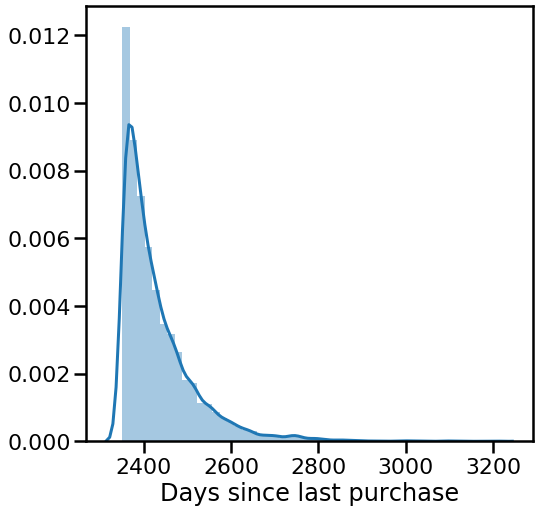

In [56]:
# Plotting for the last day since the customer made a purchase:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.distplot(rfm['recency'])
plt.xlabel('Days since last purchase')

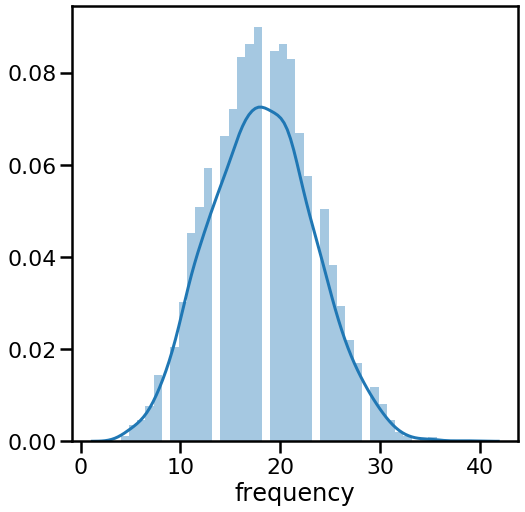

In [57]:
# Plotting the number of times the customer has made a purchase:

plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.distplot(rfm['frequency'])

Text(0.5, 0, 'IDR')

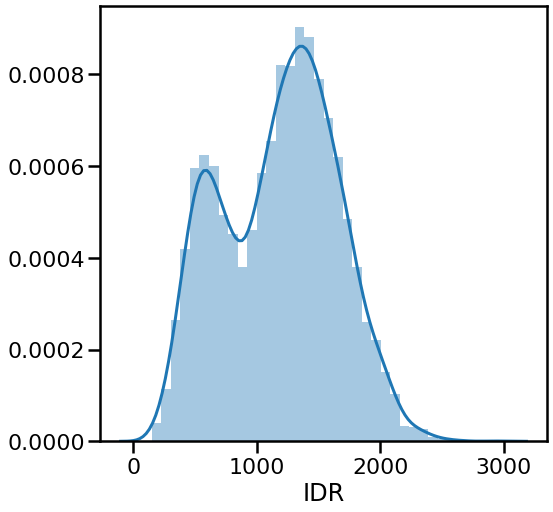

In [58]:
# Plotting the total revenue that the particular customer brought in to the shop:

plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.distplot(rfm['monetary'])
plt.xlabel('IDR')

In [59]:
# Since we have a basic idea of what the distribution of the three indicators, lets use quantiles to educate ourselves further with quantiles:
rfm.quantile([.33, .66, 1], axis=0) 

,recency,frequency,monetary
0.33,2381.0,16.0,973.0
0.66,2436.0,20.0,1414.0
1.00,3208.0,39.0,2933.0


In [60]:
# copying the rfm dataset so that it isn't affected by the changes:
RFMscores = rfm.copy()
RFMscores.shape

(6889, 3)

In [61]:
# Automate slice quantile for each variable
RFMscores['recency_score']    = pd.qcut(RFMscores['recency'], 3, labels=[3, 2, 1])
RFMscores['frequency_score']  = pd.qcut(RFMscores['frequency'], 3, labels=[1, 2, 3])
RFMscores['monetary_score']   = pd.qcut(RFMscores['monetary'], 3, labels= [1, 2, 3])

In [63]:
RFMscores = RFMscores.reset_index()
RFMscores


,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,CS1112,2412.0,15,1012,2,1,2
1,CS1113,2386.0,20,1490,2,2,3
2,CS1114,2383.0,19,1432,2,2,3
3,CS1115,2362.0,22,1659,3,3,3
4,CS1116,2554.0,13,857,1,1,1
...,...,...,...,...,...,...,...
6884,CS8996,2448.0,13,582,1,1,1
6885,CS8997,2612.0,14,543,1,1,1
6886,CS8998,2435.0,13,624,2,1,1
6887,CS8999,2608.0,12,383,1,1,1


In [64]:
# Convert data type
RFMscores['recency_score']    = RFMscores.recency_score.astype(int)
RFMscores['frequency_score']  = RFMscores.frequency_score.astype(int)
RFMscores['monetary_score']   = RFMscores.monetary_score.astype(int)
RFMscores['rfm_score'] = RFMscores['recency_score'].map(str) + RFMscores['frequency_score'].map(str) + RFMscores['monetary_score'].map(str)

In [65]:
RFMscores.head ()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,CS1112,2412.0,15,1012,2,1,2,212
1,CS1113,2386.0,20,1490,2,2,3,223
2,CS1114,2383.0,19,1432,2,2,3,223
3,CS1115,2362.0,22,1659,3,3,3,333
4,CS1116,2554.0,13,857,1,1,1,111


In [74]:
rfm_reference = pd.read_csv (r'C:\Users\Asus\Desktop\rfm_score_dim.csv')
rfm_reference['rfm_score']   = rfm_reference.rfm_score.map(str)

In [75]:
rfm_reference.head ()

,segment_name,rfm_score
0,ABOUT TO SLEEP,112
1,ABOUT TO SLEEP,113
2,ABOUT TO SLEEP,121
3,ABOUT TO SLEEP,122
4,ABOUT TO SLEEP,131


In [76]:
RFMscores = pd.merge (RFMscores, rfm_reference, on = ['rfm_score'])

In [77]:
RFMscores

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment_name
0,CS1112,2412.0,15,1012,2,1,2,212,ABOUT TO SLEEP
1,CS1122,2393.0,16,1156,2,1,2,212,ABOUT TO SLEEP
2,CS1208,2386.0,15,1000,2,1,2,212,ABOUT TO SLEEP
3,CS1262,2435.0,16,1040,2,1,2,212,ABOUT TO SLEEP
4,CS1265,2402.0,14,1128,2,1,2,212,ABOUT TO SLEEP
...,...,...,...,...,...,...,...,...,...
6884,CS7624,2390.0,21,802,2,3,1,231,AVERAGE
6885,CS7969,2391.0,21,891,2,3,1,231,AVERAGE
6886,CS8179,2432.0,23,960,2,3,1,231,AVERAGE
6887,CS8263,2390.0,21,810,2,3,1,231,AVERAGE


### Result and Insight

In [78]:
RFMscores.groupby('segment_name')['monetary'].agg(total_monetary='sum', number_customer='count')

,total_monetary,number_customer
segment_name,,
ABOUT TO SLEEP,1590540,1681
AVERAGE,687751,580
CANNOT LOOSE THEM,906097,555
CHAMPION,1478706,859
LOST CUSTOMER,551584,931
LOYAL,1525492,925
POTENTIAL LOYALIST,857517,663
RECENT CUSTOMER,526302,695


In [81]:
RFMscores.groupby('segment_name')['frequency'].agg(total_frequency='sum', number_customer='count')

,total_frequency,number_customer
segment_name,,
ABOUT TO SLEEP,26018,1681
AVERAGE,10623,580
CANNOT LOOSE THEM,12862,555
CHAMPION,20938,859
LOST CUSTOMER,11043,931
LOYAL,21690,925
POTENTIAL LOYALIST,12564,663
RECENT CUSTOMER,9262,695


In [80]:
RFMscores.groupby('segment_name')['recency'].agg(mean_recentcy_days='mean', number_customer='count')

,mean_recentcy_days,number_customer
segment_name,,
ABOUT TO SLEEP,2457.145152,1681
AVERAGE,2401.274138,580
CANNOT LOOSE THEM,2492.439640,555
CHAMPION,2364.941793,859
LOST CUSTOMER,2552.312567,931
LOYAL,2397.380541,925
POTENTIAL LOYALIST,2375.689291,663
RECENT CUSTOMER,2365.490647,695
